In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install face_recognition opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#import necessary libraries
import face_recognition #import face_recognition libraries
import cv2 #openCV library for computer vision
import numpy as np # NumPy library for numerical operations
import matplotlib.pyplot as plt # Matplotlib library for plotting

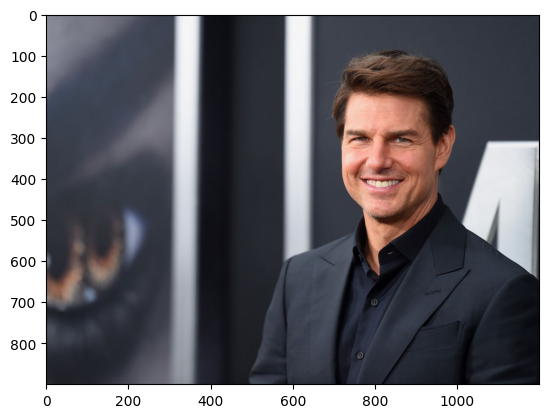

In [4]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the specified file path
img = mpimg.imread(r'face1.jpg')

# Display the image using matplotlib
imgplot = plt.imshow(img)

# Show the plot (display the image)
plt.show()


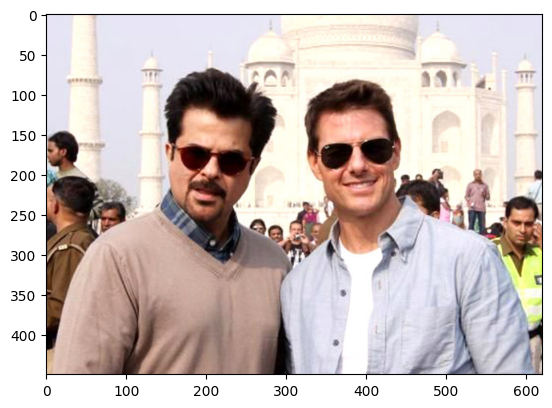

In [5]:
# Load an image from the specified file path
img2 = mpimg.imread(r'face2.jpg')

# Display the loaded image using matplotlib
imgplot = plt.imshow(img2)

# Show the plot, effectively displaying the image
plt.show()


In [7]:
def compare_and_mark_faces(main_image_path, target_image_path):
    
    # Load the main image and the target image
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings for the main and target images
    main_face_locations = face_recognition.face_locations(main_image)
    target_face_locations = face_recognition.face_locations(target_image)
    
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the main image for visualization
    main_image_marked = np.copy(main_image)

    # Iterate through faces in the main image
    for main_face_location, main_face_encoding in zip(main_face_locations, main_face_encodings):
        # Compare the face encoding with all face encodings in the target image
        results = face_recognition.compare_faces(target_face_encodings, main_face_encoding)

        # Check if there is at least one match
        if True in results:
            # Find the index of the first matching face in the target image
            target_index = results.index(True)

            # Draw a red bounding box around the matching face in the main image
            top, right, bottom, left = main_face_location
            cv2.rectangle(main_image_marked, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the marked main image
    #cv2.imshow('Face Matching with Marking', main_image_marked)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    plt.imshow(main_image_marked)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Specify the paths to the main image and the target image
main_image_path = (r'face2.jpg')
#main_image_path = "duals.jpg"
target_image_path = (r'face1.jpg')
#target_image_path = "target_template_II.jpg"




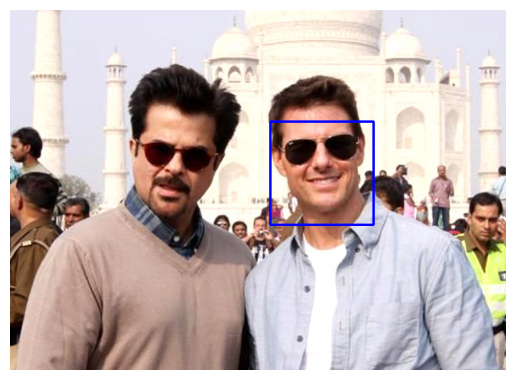

In [8]:
# Call the function for face comparison and marking
compare_and_mark_faces(main_image_path, target_image_path)